<a href="https://colab.research.google.com/github/swilsonmfc/trees/blob/master/Poker.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Poker

![](https://i.etsystatic.com/19649291/r/il/9a6f10/1844621007/il_570xN.1844621007_h7a5.jpg)

# Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import requests

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report

In [2]:
%matplotlib inline

# Data
* Hand Values
  * 0: Nothing in hand; not a recognized poker hand
  * 1: One pair; one pair of equal ranks within five cards
  * 2: Two pairs; two pairs of equal ranks within five cards
  * 3: Three of a kind; three equal ranks within five cards
  * 4: Straight; five cards, sequentially ranked with no gaps
  * 5: Flush; five cards with the same suit
  * 6: Full house; pair + different rank three of a kind
  * 7: Four of a kind; four equal ranks within five cards
  * 8: Straight flush; straight + flush
  * 9: Royal flush; {Ace, King, Queen, Jack, Ten} + flush



In [3]:
hand_labels = [
  'Nothing',
  'One Pair',
  'Two Pair',
  'Three of a kind',
  'Straight',
  'Flush',
  'Full house',
  'Four of a kind',
  'Straight flush',
  'Royal flush'
]

In [4]:
columns = []
for card in range(5):
  columns.append(f'suit_{card}')
  columns.append(f'card_{card}')
columns.append('hand')

In [5]:
train = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/poker/poker-hand-training-true.data', names=columns, index_col=False)
test  = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/poker/poker-hand-testing.data', names=columns, index_col=False)

In [ ]:
train

,suit_0,card_0,suit_1,card_1,suit_2,card_2,suit_3,card_3,suit_4,card_4,hand
0,1,10,1,11,1,13,1,12,1,1,9
1,2,11,2,13,2,10,2,12,2,1,9
2,3,12,3,11,3,13,3,10,3,1,9
3,4,10,4,11,4,1,4,13,4,12,9
4,4,1,4,13,4,12,4,11,4,10,9
...,...,...,...,...,...,...,...,...,...,...,...
25005,3,9,2,6,4,11,4,12,2,4,0
25006,4,1,4,10,3,13,3,4,1,10,1
25007,2,1,2,10,4,4,4,1,4,13,1
25008,2,12,4,3,1,10,1,12,4,9,1


# Task
* Given five cards ... what's the hand?

# EDA
* Quite Imbalanced

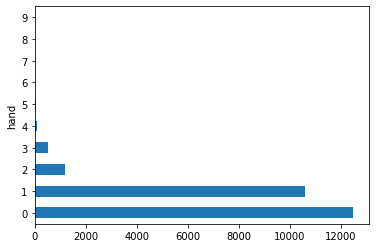

In [ ]:
train.groupby('hand').size().plot.barh()

In [ ]:
train.hand.value_counts()

0    12493
1    10599
2     1206
3      513
4       93
5       54
6       36
7        6
9        5
8        5
Name: hand, dtype: int64

# Train - Test
* Test set is much larger than training
* Training is much smaller than possible hands
* Poker has 2,598,960 distinct hands

In [8]:
print(f'Training set {len(train):,}')
print(f'Test set     {len(test):,}')

Training set 25,010
Test set     1,000,000


# Helpers

# Data

In [ ]:
X_train = train.drop(columns=['hand'])
y_train = train.hand

X_test = test.drop(columns=['hand'])
y_test = test.hand

# Baseline

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
pred = rf.predict(X_test)
print(classification_report(y_test, pred, target_names=hand_labels))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                 precision    recall  f1-score   support

        Nothing       0.64      0.80      0.71    501209
       One Pair       0.57      0.50      0.53    422498
       Two Pair       0.39      0.00      0.01     47622
Three of a kind       0.43      0.00      0.00     21121
       Straight       0.23      0.00      0.00      3885
          Flush       1.00      0.00      0.00      1996
     Full house       0.00      0.00      0.00      1424
 Four of a kind       0.00      0.00      0.00       230
 Straight flush       0.00      0.00      0.00        12
    Royal flush       0.00      0.00      0.00         3

       accuracy                           0.61   1000000
      macro avg       0.33      0.13      0.13   1000000
   weighted avg       0.59      0.61      0.58   1000000



# Features

## Flushes

![](https://images.images4us.com/888poker/en/how-to-play-hands-06_1447083537109_tcm1488-264295.jpg)

In [ ]:
print(f'Hands correct {np.sum(np.where(pred == y_test, 1, 0)):,}')
print(f'Hands failed  {np.sum(np.where(pred != y_test, 1, 0)):,}')

Hands correct 613,583
Hands failed  386,417


In [ ]:
X_train_feature = X_train.copy()
X_test_feature  = X_test.copy()

In [ ]:
suits = ['suit_0', 'suit_1', 'suit_2', 'suit_3', 'suit_4']
X_train_feature['unique_suits'] = X_train_feature[suits].nunique(axis=1)
X_test_feature['unique_suits']  = X_test_feature[suits].nunique(axis=1)

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train_feature, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
pred = rf.predict(X_test_feature)
print(classification_report(y_test, pred, target_names=hand_labels))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                 precision    recall  f1-score   support

        Nothing       0.62      0.79      0.70    501209
       One Pair       0.56      0.48      0.52    422498
       Two Pair       0.33      0.00      0.01     47622
Three of a kind       0.48      0.00      0.00     21121
       Straight       0.08      0.00      0.00      3885
          Flush       0.99      1.00      1.00      1996
     Full house       0.50      0.00      0.00      1424
 Four of a kind       0.00      0.00      0.00       230
 Straight flush       0.00      0.00      0.00        12
    Royal flush       0.00      0.00      0.00         3

       accuracy                           0.60   1000000
      macro avg       0.36      0.23      0.22   1000000
   weighted avg       0.58      0.60      0.57   1000000



## Matches

![](https://images.images4us.com/888poker/en/how-to-play-hands-03_1447083507417_tcm1488-264291.jpg)

In [ ]:
print(f'Hands correct {np.sum(np.where(pred == y_test, 1, 0)):,}')
print(f'Hands failed  {np.sum(np.where(pred != y_test, 1, 0)):,}')

Hands correct 600,760
Hands failed  399,240


In [ ]:
cards = ['card_0', 'card_1', 'card_2', 'card_3', 'card_4']
X_train_feature['unique_cards'] = X_train_feature[cards].nunique(axis=1)
X_test_feature['unique_cards']  = X_test_feature[cards].nunique(axis=1)

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train_feature, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
pred = rf.predict(X_test_feature)
print(classification_report(y_test, pred, target_names=hand_labels))

                 precision    recall  f1-score   support

        Nothing       0.99      1.00      1.00    501209
       One Pair       1.00      1.00      1.00    422498
       Two Pair       0.70      0.96      0.81     47622
Three of a kind       0.49      0.08      0.14     21121
       Straight       1.00      0.00      0.00      3885
          Flush       0.99      1.00      1.00      1996
     Full house       0.85      0.73      0.79      1424
 Four of a kind       0.44      0.02      0.03       230
 Straight flush       0.00      0.00      0.00        12
    Royal flush       0.00      0.00      0.00         3

       accuracy                           0.97   1000000
      macro avg       0.65      0.48      0.48   1000000
   weighted avg       0.97      0.97      0.97   1000000



## Straights

![](https://images.images4us.com/888poker/en/Straight%20Hand%20in%20Poker-1567767626918_tcm1488-462236.jpg)

In [ ]:
print(f'Hands correct {np.sum(np.where(pred == y_test, 1, 0)):,}')
print(f'Hands failed  {np.sum(np.where(pred != y_test, 1, 0)):,}')

Hands correct 974,333
Hands failed  25,667


In [ ]:
X_train_feature['card_min'] = X_train_feature[cards].min(axis=1)
X_train_feature['card_max'] = X_train_feature[cards].max(axis=1)
X_train_feature['card_distance'] = X_train_feature.card_max - X_train_feature.card_min

X_test_feature['card_min'] = X_test_feature[cards].min(axis=1)
X_test_feature['card_max'] = X_test_feature[cards].max(axis=1)
X_test_feature['card_distance'] = X_test_feature.card_max - X_test_feature.card_min

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train_feature, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
pred = rf.predict(X_test_feature)
print(classification_report(y_test, pred, target_names=hand_labels))

                 precision    recall  f1-score   support

        Nothing       1.00      1.00      1.00    501209
       One Pair       1.00      1.00      1.00    422498
       Two Pair       0.69      0.95      0.80     47622
Three of a kind       0.39      0.08      0.13     21121
       Straight       1.00      0.90      0.95      3885
          Flush       1.00      0.97      0.98      1996
     Full house       0.86      0.21      0.33      1424
 Four of a kind       0.67      0.01      0.02       230
 Straight flush       1.00      0.42      0.59        12
    Royal flush       0.00      0.00      0.00         3

       accuracy                           0.98   1000000
      macro avg       0.76      0.55      0.58   1000000
   weighted avg       0.97      0.98      0.97   1000000



## Card Counts

![](https://images.images4us.com/888poker/en/how-to-play-hands-04_1447083517027_tcm1488-264292.jpg)

In [ ]:
print(f'Hands correct {np.sum(np.where(pred == y_test, 1, 0)):,}')
print(f'Hands failed  {np.sum(np.where(pred != y_test, 1, 0)):,}')

Hands correct 976,324
Hands failed  23,676


In [ ]:
for card in range(14):
  X_train_feature[f'count_{card}'] = np.where(X_train_feature.card_0 == card, 1, 0) + \
                                     np.where(X_train_feature.card_1 == card, 1, 0) + \
                                     np.where(X_train_feature.card_2 == card, 1, 0) + \
                                     np.where(X_train_feature.card_3 == card, 1, 0) + \
                                     np.where(X_train_feature.card_4 == card, 1, 0) 

  X_test_feature[f'count_{card}'] = np.where(X_test_feature.card_0 == card, 1, 0) + \
                                     np.where(X_test_feature.card_1 == card, 1, 0) + \
                                     np.where(X_test_feature.card_2 == card, 1, 0) + \
                                     np.where(X_test_feature.card_3 == card, 1, 0) + \
                                     np.where(X_test_feature.card_4 == card, 1, 0) 

counts = [f'count_{card}' for card in range(14)]
X_train_feature['any_two']   = np.where(np.any(X_train_feature[counts] == 2, axis=1), 1, 0)
X_train_feature['any_three'] = np.where(np.any(X_train_feature[counts] == 3, axis=1), 1, 0)
X_train_feature['any_four']  = np.where(np.any(X_train_feature[counts] == 4, axis=1), 1, 0)

X_test_feature['any_two']   = np.where(np.any(X_test_feature[counts] == 2, axis=1), 1, 0)
X_test_feature['any_three'] = np.where(np.any(X_test_feature[counts] == 3, axis=1), 1, 0)
X_test_feature['any_four']  = np.where(np.any(X_test_feature[counts] == 4, axis=1), 1, 0)

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train_feature, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
pred = rf.predict(X_test_feature)
print(classification_report(y_test, pred, target_names=hand_labels))

                 precision    recall  f1-score   support

        Nothing       1.00      1.00      1.00    501209
       One Pair       1.00      1.00      1.00    422498
       Two Pair       1.00      1.00      1.00     47622
Three of a kind       1.00      1.00      1.00     21121
       Straight       1.00      0.90      0.95      3885
          Flush       1.00      1.00      1.00      1996
     Full house       1.00      1.00      1.00      1424
 Four of a kind       1.00      0.98      0.99       230
 Straight flush       1.00      0.42      0.59        12
    Royal flush       0.40      0.67      0.50         3

       accuracy                           1.00   1000000
      macro avg       0.94      0.90      0.90   1000000
   weighted avg       1.00      1.00      1.00   1000000



## Straight Flushes

![](https://images.images4us.com/888poker/en/how-to-play-hands-09_1447083575757_tcm1488-264294.jpg)

In [ ]:
print(f'Hands correct {np.sum(np.where(pred == y_test, 1, 0)):,}')
print(f'Hands failed  {np.sum(np.where(pred != y_test, 1, 0)):,}')

Hands correct 999,610
Hands failed  390


In [ ]:
X_train_feature['straight_flush'] = np.where((X_train_feature.card_distance == 4) & (X_train_feature.unique_suits == 1), 1, 0)
X_test_feature ['straight_flush'] = np.where((X_test_feature.card_distance  == 4) & (X_test_feature.unique_suits  == 1), 1, 0)

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train_feature, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
pred = rf.predict(X_test_feature)
print(classification_report(y_test, pred, target_names=hand_labels))

                 precision    recall  f1-score   support

        Nothing       1.00      1.00      1.00    501209
       One Pair       1.00      1.00      1.00    422498
       Two Pair       1.00      1.00      1.00     47622
Three of a kind       1.00      1.00      1.00     21121
       Straight       1.00      0.90      0.95      3885
          Flush       1.00      1.00      1.00      1996
     Full house       1.00      1.00      1.00      1424
 Four of a kind       1.00      1.00      1.00       230
 Straight flush       1.00      1.00      1.00        12
    Royal flush       0.60      1.00      0.75         3

       accuracy                           1.00   1000000
      macro avg       0.96      0.99      0.97   1000000
   weighted avg       1.00      1.00      1.00   1000000



## Aces

![](https://images.images4us.com/888poker/en/how-to-play-hands-01_1447083402389_tcm1488-264288.jpg)

In [ ]:
print(f'Hands correct {np.sum(np.where(pred == y_test, 1, 0)):,}')
print(f'Hands failed  {np.sum(np.where(pred != y_test, 1, 0)):,}')

Hands correct 999,622
Hands failed  378


In [ ]:
mask = pred != y_test
error_df = X_test_feature.copy()
error_df['Actual']    = y_test
error_df['Predicted'] = pred
error_df[mask]

,suit_0,card_0,suit_1,card_1,suit_2,card_2,suit_3,card_3,suit_4,card_4,unique_suits,unique_cards,card_min,card_max,card_distance,count_0,count_1,count_2,count_3,count_4,count_5,count_6,count_7,count_8,count_9,count_10,count_11,count_12,count_13,any_two,any_three,any_four,straight_flush,Actual,Predicted
815,3,10,1,13,1,12,1,11,1,1,2,5,1,13,12,0,1,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,4,0
2526,2,12,4,11,2,1,4,10,3,13,3,5,1,13,12,0,1,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,4,0
4606,4,13,1,12,3,11,3,10,3,1,3,5,1,13,12,0,1,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,4,0
4912,3,1,2,12,2,10,3,13,1,11,3,5,1,13,12,0,1,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,4,0
8195,1,13,1,11,2,1,3,12,1,10,3,5,1,13,12,0,1,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994228,4,13,1,12,4,11,3,10,2,1,4,5,1,13,12,0,1,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,4,0
995091,2,2,2,10,2,12,2,13,2,1,1,5,1,13,12,0,1,1,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,5,9
997030,4,1,4,11,2,13,4,12,2,10,2,5,1,13,12,0,1,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,4,0
997998,4,10,2,1,4,13,2,12,3,11,3,5,1,13,12,0,1,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,4,0


In [ ]:
error_df[mask].groupby(['Actual', 'Predicted']).size()

Actual  Predicted
4       0            376
5       9              2
dtype: int64

In [ ]:
tmp = X_train_feature[cards].copy()
tmp['card_min_ace_low'] = tmp[cards].min(axis=1)
tmp['card_max_ace_low'] = tmp[cards].max(axis=1)

tmp = tmp.replace({'card_0':1, 'card_1':1, 'card_2':1, 'card_3':1, 'card_4':1}, 14)
tmp['card_min_ace_high'] = tmp[cards].min(axis=1)
tmp['card_max_ace_high'] = tmp[cards].max(axis=1)

tmp['card_distance_ace_low']  = tmp.card_max_ace_low  - tmp.card_min_ace_low
tmp['card_distance_ace_high'] = tmp.card_max_ace_high - tmp.card_min_ace_high
X_train_feature['card_distance'] = tmp[['card_distance_ace_low', 'card_distance_ace_high']].min(axis=1)

In [ ]:
tmp = X_test_feature[cards].copy()
tmp['card_min_ace_low'] = tmp[cards].min(axis=1)
tmp['card_max_ace_low'] = tmp[cards].max(axis=1)

tmp = tmp.replace({'card_0':1, 'card_1':1, 'card_2':1, 'card_3':1, 'card_4':1}, 14)
tmp['card_min_ace_high'] = tmp[cards].min(axis=1)
tmp['card_max_ace_high'] = tmp[cards].max(axis=1)

tmp['card_distance_ace_low']  = tmp.card_max_ace_low  - tmp.card_min_ace_low
tmp['card_distance_ace_high'] = tmp.card_max_ace_high - tmp.card_min_ace_high
X_test_feature['card_distance'] = tmp[['card_distance_ace_low', 'card_distance_ace_high']].min(axis=1)

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train_feature, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
pred = rf.predict(X_test_feature)
print(classification_report(y_test, pred, target_names=hand_labels))

                 precision    recall  f1-score   support

        Nothing       1.00      1.00      1.00    501209
       One Pair       1.00      1.00      1.00    422498
       Two Pair       1.00      1.00      1.00     47622
Three of a kind       1.00      1.00      1.00     21121
       Straight       1.00      1.00      1.00      3885
          Flush       1.00      1.00      1.00      1996
     Full house       1.00      1.00      1.00      1424
 Four of a kind       1.00      0.93      0.96       230
 Straight flush       1.00      0.83      0.91        12
    Royal flush       1.00      1.00      1.00         3

       accuracy                           1.00   1000000
      macro avg       1.00      0.98      0.99   1000000
   weighted avg       1.00      1.00      1.00   1000000



In [ ]:
mask = pred != y_test
error_df = X_test_feature.copy()
error_df['Actual']    = y_test
error_df['Predicted'] = pred
error_df[mask]

,suit_0,card_0,suit_1,card_1,suit_2,card_2,suit_3,card_3,suit_4,card_4,unique_suits,unique_cards,card_min,card_max,card_distance,count_0,count_1,count_2,count_3,count_4,count_5,count_6,count_7,count_8,count_9,count_10,count_11,count_12,count_13,any_two,any_three,any_four,straight_flush,Actual,Predicted
3204,4,1,1,1,3,2,3,1,2,1,4,2,1,2,1,0,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,7,3
40132,1,2,1,1,3,1,4,1,2,1,4,2,1,2,1,0,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,7,3
231194,2,1,3,1,1,1,2,4,4,1,4,2,1,4,3,0,4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,7,3
295268,1,1,4,1,2,1,4,6,3,1,4,2,1,6,5,0,4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,7,3
328223,4,1,1,1,2,1,2,9,3,1,4,2,1,9,5,0,4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,7,3
374458,3,1,4,1,1,1,3,4,2,1,4,2,1,4,3,0,4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,7,3
381829,1,1,2,1,3,1,4,1,3,13,4,2,1,13,1,0,4,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,7,3
439689,1,1,2,1,3,1,4,1,4,3,4,2,1,3,2,0,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,7,3
509065,2,12,2,11,2,13,2,9,2,10,1,5,9,13,4,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0,0,0,1,8,4
588365,3,1,4,1,2,1,1,2,1,1,4,2,1,2,1,0,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,7,3


## Balancing

In [ ]:
print(f'Hands correct {np.sum(np.where(pred == y_test, 1, 0)):,}')
print(f'Hands failed  {np.sum(np.where(pred != y_test, 1, 0)):,}')

Hands correct 999,982
Hands failed  18


In [ ]:
weights = {0:1, 
           1:1, 
           2:1, 
           3:1, 
           4:1, 
           5:1, 
           6:50, 
           7:100, 
           8:100, 
           9:100}

In [ ]:
rf = RandomForestClassifier(class_weight=weights)
rf.fit(X_train_feature, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight={0: 1, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 50,
                                     7: 100, 8: 100, 9: 100},
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
pred = rf.predict(X_test_feature)
print(classification_report(y_test, pred, target_names=hand_labels))

                 precision    recall  f1-score   support

        Nothing       1.00      1.00      1.00    501209
       One Pair       1.00      1.00      1.00    422498
       Two Pair       1.00      1.00      1.00     47622
Three of a kind       1.00      1.00      1.00     21121
       Straight       1.00      1.00      1.00      3885
          Flush       1.00      1.00      1.00      1996
     Full house       1.00      1.00      1.00      1424
 Four of a kind       1.00      1.00      1.00       230
 Straight flush       1.00      1.00      1.00        12
    Royal flush       1.00      1.00      1.00         3

       accuracy                           1.00   1000000
      macro avg       1.00      1.00      1.00   1000000
   weighted avg       1.00      1.00      1.00   1000000



In [ ]:
mask = pred != y_test
error_df = X_test_feature.copy()
error_df['Actual']    = y_test
error_df['Predicted'] = pred
error_df[mask]

,suit_0,card_0,suit_1,card_1,suit_2,card_2,suit_3,card_3,suit_4,card_4,unique_suits,unique_cards,card_min,card_max,card_distance,count_0,count_1,count_2,count_3,count_4,count_5,count_6,count_7,count_8,count_9,count_10,count_11,count_12,count_13,any_two,any_three,any_four,straight_flush,Actual,Predicted


# Final

In [ ]:
print(f'Hands correct {np.sum(np.where(pred == y_test, 1, 0)):,}')
print(f'Hands failed  {np.sum(np.where(pred != y_test, 1, 0)):,}')

Hands correct 1,000,000
Hands failed  0


## Importance

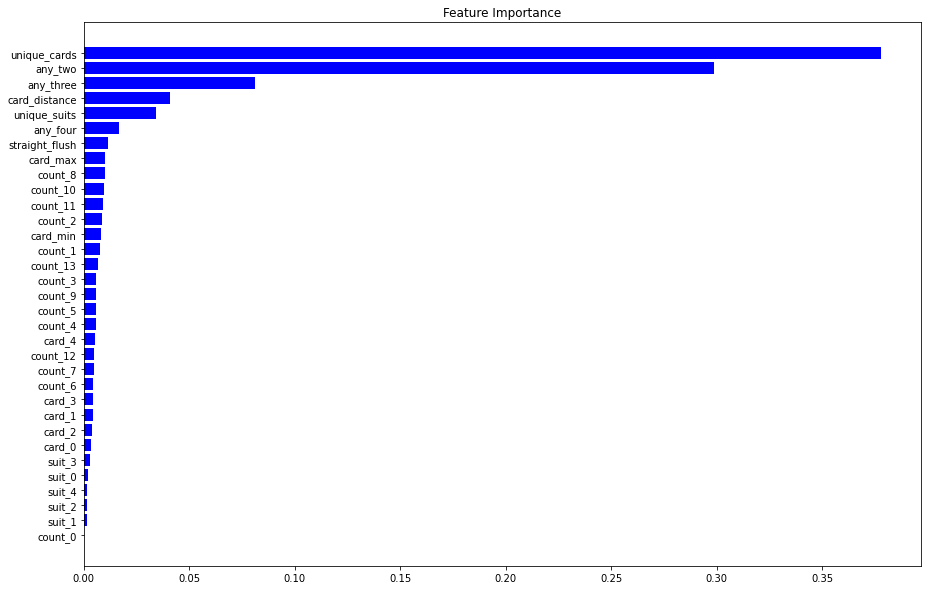

In [ ]:

features = X_train_feature.columns
importances = rf.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(15,10))
plt.title('Feature Importance')
plt.barh(range(len(indices)),   importances[indices], color='b')
plt.yticks(range(len(indices)), features[indices])
plt.show()

# Notes
* Trees are good at finding patterns, but can't feature engineer
* Adding features helps trees solve
* Using RandomForests, Boosting, DecisionTrees - invest in error analysis & feature engineering